<a href="https://colab.research.google.com/github/gmazzitelli/studenti/blob/master/ransac_pipline_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import matplotlib.pyplot as plt
# load data 
y_values = np.array([0.00441025, 0.0049001 , 0.01041189, 0.47368389, 0.34841961,
       0.3487533 , 0.35067096, 0.31142986, 0.3268407 , 0.38099566,
       0.3933048 , 0.3479948 , 0.02359819, 0.36329588, 0.42535543,
       0.01308297, 0.53873956, 0.6511364 , 0.61865282, 0.64750302,
       0.6630047 , 0.66744816, 0.71759617, 0.05965622, 0.71335208,
       0.71992683, 0.61635697, 0.12985441, 0.73410642, 0.77318621,
       0.75675988, 0.03003641, 0.77527201, 0.78673995, 0.05049178,
       0.55139476, 0.02665514, 0.61664748, 0.81121749, 0.05521697,
       0.63404375, 0.32649395, 0.36828268, 0.68981099, 0.02874863,
       0.61574739])
x_values = np.linspace(0, 1, len(y_values))

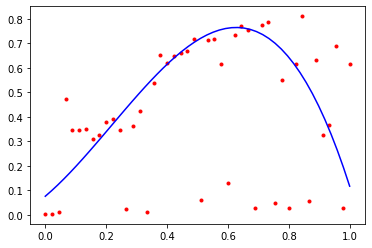

In [11]:
#
#  PIPLINE usage
#

poly_degree = 3

from sklearn.linear_model import (
    LinearRegression, TheilSenRegressor, RANSACRegressor, HuberRegressor)
#
# different regression method can be apply 
# see https://scikit-learn.org/stable/auto_examples/linear_model/plot_robust_fit.html#sphx-glr-auto-examples-linear-model-plot-robust-fit-py
# see below
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

plt.plot(x_values, y_values, 'r.')
x_plot = np.linspace(x_values.min(), x_values.max())
X = x_values[:, np.newaxis]

model = make_pipeline(PolynomialFeatures(poly_degree), RANSACRegressor())
model.fit(X, y_values)
mse = mean_squared_error(model.predict(X), y_values)

y_plot = model.predict(x_plot[:, np.newaxis])
plt.plot(x_plot, y_plot, 'b-', label='error = %.3f' % (mse))
plt.show()

[-1.5869385   2.11680255  0.01613176]


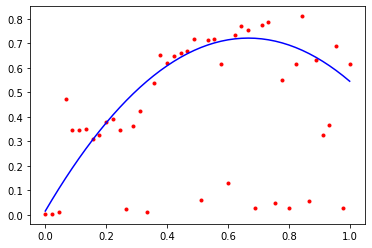

In [10]:
#
# fit whitout PIPLINE
#
poly_degree = 2

plt.plot(x_values, y_values, 'r.')
x_plot = np.linspace(x_values.min(), x_values.max())
X = x_values[:, np.newaxis]

function_feature = PolynomialFeatures(poly_degree)
X = function_feature.fit_transform(X, y_values)
ransac = RANSACRegressor()
rfit = ransac.fit(X, y_values)
y_plot = rfit.predict(X)

coeffs = np.polyfit(x_values, y_plot, poly_degree)
print (coeffs)
plt.plot(x_values, y_plot, 'b-')
plt.show()

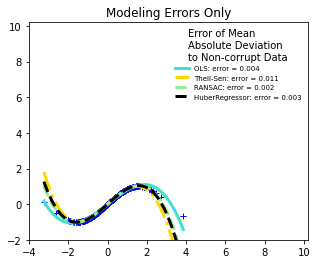

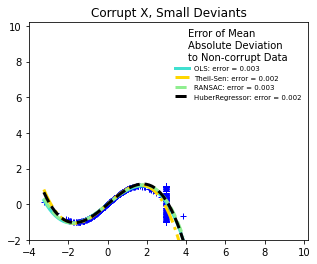

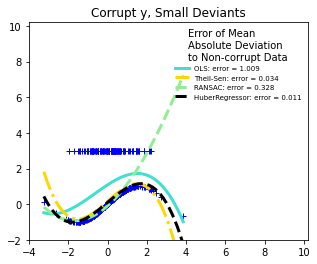

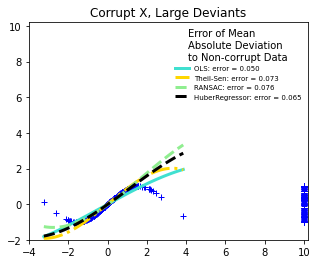

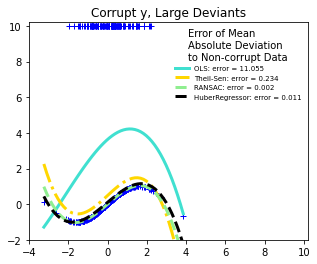

In [15]:
from matplotlib import pyplot as plt
import numpy as np
# see https://scikit-learn.org/stable/auto_examples/linear_model/plot_robust_fit.html#sphx-glr-auto-examples-linear-model-plot-robust-fit-py

from sklearn.linear_model import (
    LinearRegression, TheilSenRegressor, RANSACRegressor, HuberRegressor)
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

np.random.seed(42)

X = np.random.normal(size=400)
y = np.sin(X)
# Make sure that it X is 2D
X = X[:, np.newaxis]

X_test = np.random.normal(size=200)
y_test = np.sin(X_test)
X_test = X_test[:, np.newaxis]

y_errors = y.copy()
y_errors[::3] = 3

X_errors = X.copy()
X_errors[::3] = 3

y_errors_large = y.copy()
y_errors_large[::3] = 10

X_errors_large = X.copy()
X_errors_large[::3] = 10

estimators = [('OLS', LinearRegression()),
              ('Theil-Sen', TheilSenRegressor(random_state=42)),
              ('RANSAC', RANSACRegressor(random_state=42)),
              ('HuberRegressor', HuberRegressor())]
colors = {'OLS': 'turquoise', 'Theil-Sen': 'gold',
          'RANSAC': 'lightgreen', 'HuberRegressor': 'black'}
linestyle = {'OLS': '-', 'Theil-Sen': '-.', 'RANSAC': '--', 'HuberRegressor': '--'}
lw = 3

x_plot = np.linspace(X.min(), X.max())
for title, this_X, this_y in [
        ('Modeling Errors Only', X, y),
        ('Corrupt X, Small Deviants', X_errors, y),
        ('Corrupt y, Small Deviants', X, y_errors),
        ('Corrupt X, Large Deviants', X_errors_large, y),
        ('Corrupt y, Large Deviants', X, y_errors_large)]:
    plt.figure(figsize=(5, 4))
    plt.plot(this_X[:, 0], this_y, 'b+')

    for name, estimator in estimators:
        model = make_pipeline(PolynomialFeatures(3), estimator)
        model.fit(this_X, this_y)
        mse = mean_squared_error(model.predict(X_test), y_test)
        y_plot = model.predict(x_plot[:, np.newaxis])
        plt.plot(x_plot, y_plot, color=colors[name], linestyle=linestyle[name],
                 linewidth=lw, label='%s: error = %.3f' % (name, mse))

    legend_title = 'Error of Mean\nAbsolute Deviation\nto Non-corrupt Data'
    legend = plt.legend(loc='upper right', frameon=False, title=legend_title,
                        prop=dict(size='x-small'))
    plt.xlim(-4, 10.2)
    plt.ylim(-2, 10.2)
    plt.title(title)
plt.show()